In [1]:
from pysarpu import PUClassifier
from pysarpu.classification import LinearDiscriminantClassifier, LinearLogisticRegression
from pysarpu.propensity import LogisticPropensity, LogProbitPropensity, GumbelPropensity
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

C:\Users\u607316\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
X = scs.multivariate_normal.rvs(mean=np.array([2.,2.]), cov=np.array([[0.25,0.05],[0.05, 0.25]]), size=2000)

In [24]:
beta = np.array([-15., 7.5, 0.])
Z = (np.random.rand(2000) <= scs.logistic.cdf(beta[0] + np.dot(X, beta[1:]))).astype(int)

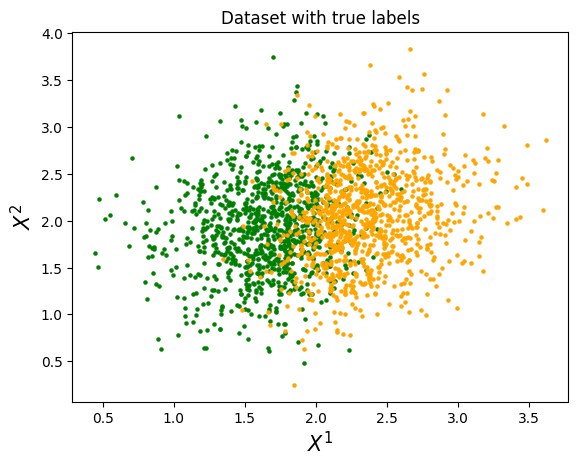

In [25]:
plt.title('Dataset with true labels')
plt.scatter(X[Z==0,0],X[Z==0,1], s=5, color='green')
plt.scatter(X[Z==1,0],X[Z==1,1], s=5, color='orange')
plt.xlabel('$X^1$', fontsize=15)
plt.ylabel('$X^2$', fontsize=15)
plt.show()

In [26]:
F = 0.8 + 0.4*np.random.rand(2000)
Xe = X.copy()
Xe[:,0] *= F
Xe[:,1] *= F
phi = np.array([-10.,0.,4.5])
Y = Z * (np.random.rand(2000)<=scs.logistic.cdf(phi[0] + np.dot(Xe, phi[1:]))).astype(int)

(array([651., 270., 183., 142., 129., 117.,  99.,  93., 100., 216.]),
 array([1.67682894e-04, 1.00135889e-01, 2.00104096e-01, 3.00072303e-01,
        4.00040509e-01, 5.00008716e-01, 5.99976922e-01, 6.99945129e-01,
        7.99913335e-01, 8.99881542e-01, 9.99849749e-01]),
 <BarContainer object of 10 artists>)

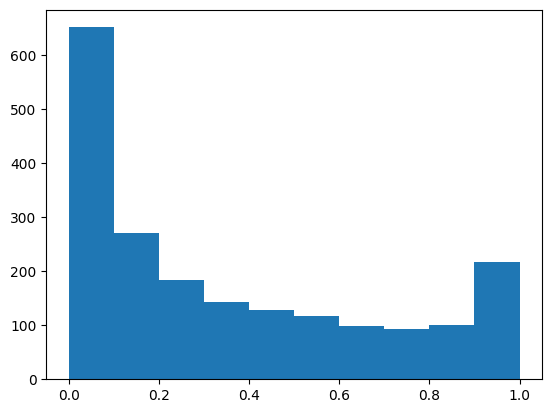

In [27]:
plt.hist(scs.logistic.cdf(phi[0] + np.dot(Xe, phi[1:])))

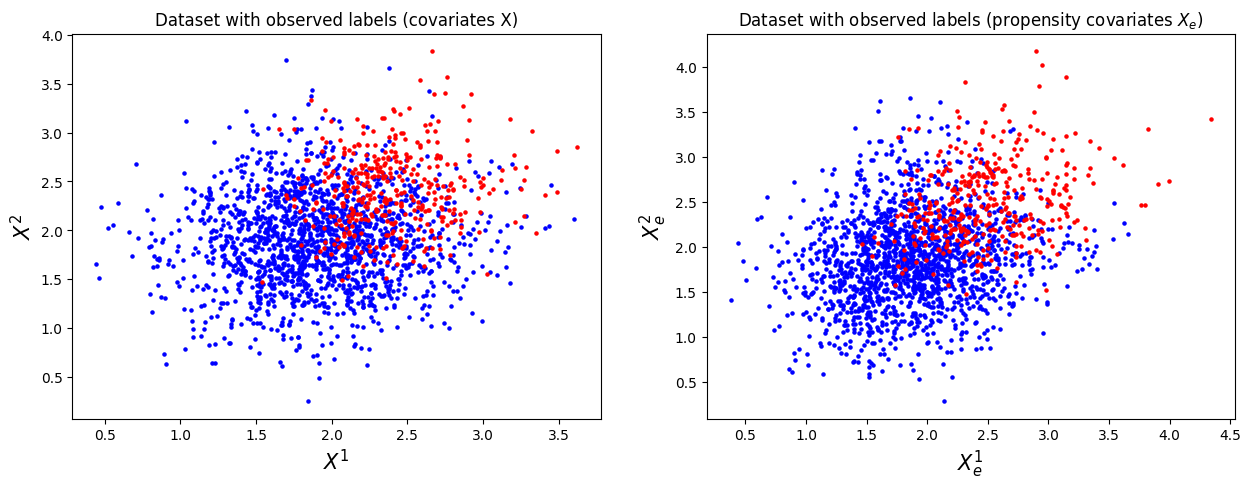

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].set_title('Dataset with observed labels (covariates X)')
axes[0].set_xlabel('$X^1$', fontsize=15)
axes[0].set_ylabel('$X^2$', fontsize=15)
axes[0].scatter(X[Y==0,0],X[Y==0,1], s=5, color='blue')
axes[0].scatter(X[Y==1,0],X[Y==1,1], s=5, color='red')

axes[1].set_title('Dataset with observed labels (propensity covariates $X_e$)')
axes[1].set_xlabel('$X_e^1$', fontsize=15)
axes[1].set_ylabel('$X_e^2$', fontsize=15)
axes[1].scatter(Xe[Y==0,0],Xe[Y==0,1], s=5, color='blue')
axes[1].scatter(Xe[Y==1,0],Xe[Y==1,1], s=5, color='red')
plt.show()

In [29]:
pu_model1 = PUClassifier(LinearLogisticRegression(), LogisticPropensity())

In [41]:
pu_model1.fit(X, Xe, Y, n_init=1)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.68it/s]


In [42]:
pu_model1.loglikelihood(X, Xe, Y)

-0.2812071637922451

In [43]:
pu_model1

PU classifier 
theta_1 = [-7.99878755 -0.9255161   5.25101423]
phi = [-11.71199059   4.0880398    0.99461429]